In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
plt.style.use('seaborn-pastel')

In [42]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
X = df.values[:,1:5]
Y_ = df.values[:,5]
Y = []
for i in range(Y_.shape[0]):
  if Y_[i] == 'Iris-setosa':
    Y.append(1)
  elif Y_[i] == 'Iris-versicolor':
    Y.append(2)
  else:
    Y.append(3)

Y = np.array(Y)

In [44]:
def distance(x1,x2):
  return np.sqrt(sum((x1-x2)**2))

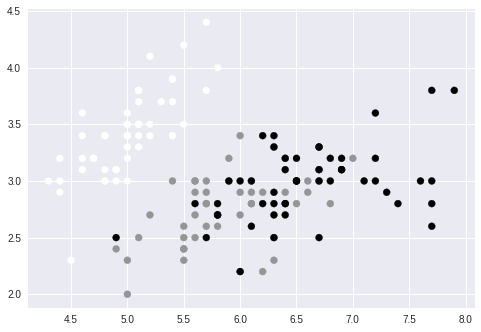

In [45]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [64]:
def knnAlgo(X,Y,query,k=10):
  dist = []
  m = X.shape[0]
  for i in range(m):
    d = distance(query,X[i])
    dist.append((d,Y[i]))
  dist = np.array(sorted(dist)[:k])
  unq = np.unique(dist[:,1],return_counts=True)
  ind = unq[1].argmax()
  return int(unq[0][ind])

In [65]:
query = np.array([4.1,3.8,1.4,0.2])
knnAlgo(X,Y,query)

1

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=32)

In [68]:
Y_pred = []
for i in range(X_test.shape[0]):
  Y_pred.append(knnAlgo(X_train,Y_train,X_test[i]))
Y_pred = np.array(Y_pred)

In [69]:
print(Y_pred)
print(Y_test)

[2 1 1 2 3 3 1 1 2 1 2 3 2 2 3 3 2 3 2 1 1 3 3 1 1 2 1 3 1 1 2 1 1 3 2 1 1
 3 3 2 1 3 1 3 1 3 2 2 2 1]
[2 1 1 2 3 3 1 1 2 1 2 3 2 2 3 3 2 3 2 1 1 3 3 1 1 2 1 3 1 1 2 1 1 3 2 1 1
 3 3 2 1 3 1 3 1 3 2 2 2 1]
